In [1]:
import pandas as pd 
import numpy as np 
from collections import Counter as c
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
import pickle 
from sklearn.linear_model import LinearRegression 

In [2]:
data = pd.read_csv("dataset/concrete.csv")

In [3]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [4]:
#data.columns=['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer',
              #'Coarse Aggregate','Fine Aggregate', 'Age','Concrete compressive strength']
#data.head(1)

#concrete_df = concrete_df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':"cement",
#       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"slag",
#       'Fly Ash (component 3)(kg in a m^3 mixture)':"ash",
#       'Water  (component 4)(kg in a m^3 mixture)':"water",
#       'Superplasticizer (component 5)(kg in a m^3 mixture)':"superplastic",
#       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"coarseagg",
#       'Fine Aggregate (component 7)(kg in a m^3 mixture)':"fineagg", 'Age (day)':"age",
#       'Concrete compressive strength(MPa, megapascals) ':"strength"})

#here we are interating and stripping the column whenever we are gettin "(" symbol
data.columns = [col[:col.find("(")].strip() for col in data.columns] 
data.head(1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99


In [5]:
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement                           1030 non-null float64
Blast Furnace Slag               1030 non-null float64
Fly Ash                          1030 non-null float64
Water                            1030 non-null float64
Superplasticizer                 1030 non-null float64
Coarse Aggregate                 1030 non-null float64
Fine Aggregate                   1030 non-null float64
Age                              1030 non-null int64
Concrete compressive strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
data.describe() 

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('int64'), dtype('float64')], dtype=object),
 array([1, 8], dtype=int64))

In [9]:
data.dtypes[data.dtypes!='O'].index.values

array(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water',
       'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'], dtype=object)

In [10]:
data.isnull().any()

Cement                           False
Blast Furnace Slag               False
Fly Ash                          False
Water                            False
Superplasticizer                 False
Coarse Aggregate                 False
Fine Aggregate                   False
Age                              False
Concrete compressive strength    False
dtype: bool

In [11]:
data.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

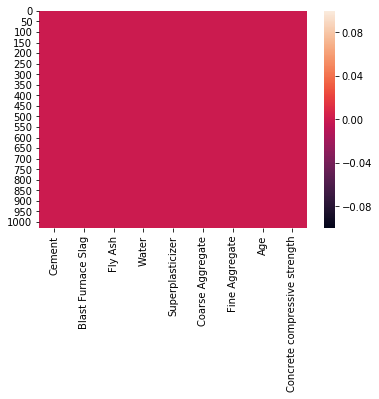

In [12]:
sns.heatmap(data.isnull())

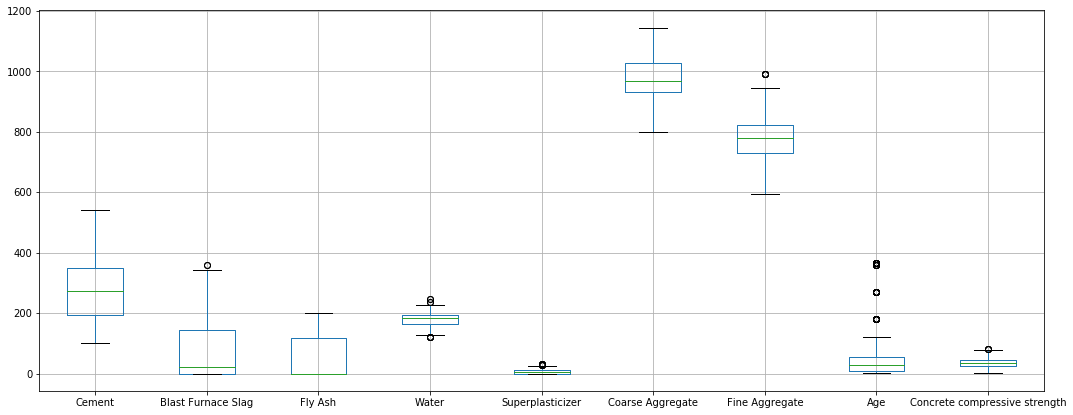

In [13]:
data.boxplot(figsize=(18,7))

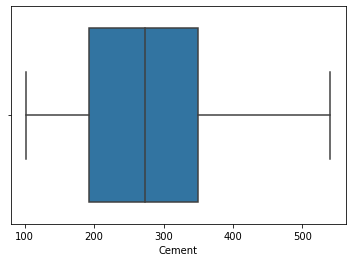

In [14]:
sns.boxplot(data["Cement"])

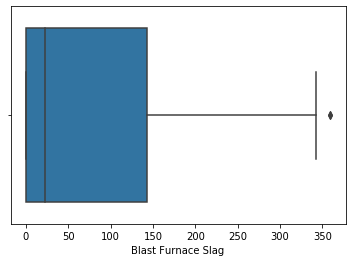

In [15]:
sns.boxplot(data["Blast Furnace Slag"])

In [16]:
q1_sibsp = data["Blast Furnace Slag"].describe()["25%"]
q3_sibsp = data["Blast Furnace Slag"].describe()["75%"]
iqr_sibsp = q3_sibsp - q1_sibsp

In [17]:
l_boundary = q1_sibsp - (1.5 * iqr_sibsp)
u_boundary = q3_sibsp + (1.5 * iqr_sibsp)

In [18]:
data[data["Blast Furnace Slag"] > u_boundary]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42
559,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44


In [19]:
(data[data["Blast Furnace Slag"] > u_boundary].shape[0]/data["Blast Furnace Slag"].shape[0])*100

0.1941747572815534

In [20]:
outlier_index = data[data["Blast Furnace Slag"] > u_boundary].index

In [21]:
outlier_index

Int64Index([553, 559], dtype='int64')

In [22]:
data.drop(outlier_index,inplace = True)

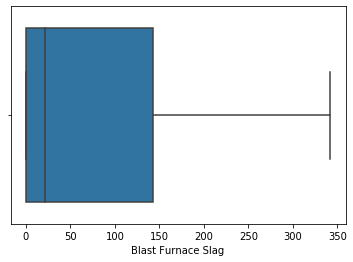

In [23]:
sns.boxplot(data["Blast Furnace Slag"])

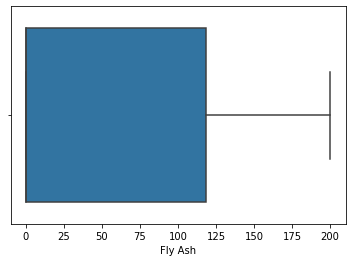

In [24]:
sns.boxplot(data["Fly Ash"])

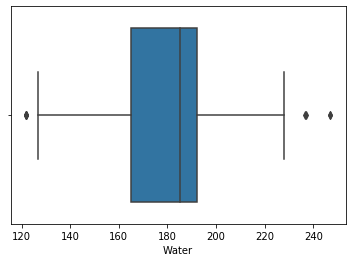

In [25]:
sns.boxplot(data["Water"])

In [26]:
q1_sibsp = data["Water"].describe()["25%"]
q3_sibsp = data["Water"].describe()["75%"]
iqr_sibsp = q3_sibsp - q1_sibsp
l_boundary = q1_sibsp - (1.5 * iqr_sibsp)
u_boundary = q3_sibsp + (1.5 * iqr_sibsp)
data[data["Water"] > u_boundary]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
862,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
873,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
936,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
1019,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23


In [27]:
(data[data["Water"] > u_boundary].shape[0]/data["Water"].shape[0])*100

0.38910505836575876

In [28]:
outlier_index = data[data["Water"] > u_boundary].index

In [29]:
outlier_index

Int64Index([862, 873, 936, 1019], dtype='int64')

In [30]:
data.drop(outlier_index,inplace = True)

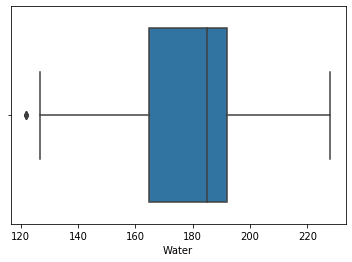

In [31]:
sns.boxplot(data["Water"])

In [32]:
data[data["Water"] < l_boundary]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
224,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
225,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82
226,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
227,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
228,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23


In [33]:
(data[data["Water"] < l_boundary].shape[0]/data["Water"].shape[0])*100

0.48828125

In [34]:
outlier_index = data[data["Water"] < l_boundary].index

In [35]:
outlier_index

Int64Index([224, 225, 226, 227, 228], dtype='int64')

In [36]:
data.drop(outlier_index,inplace = True)

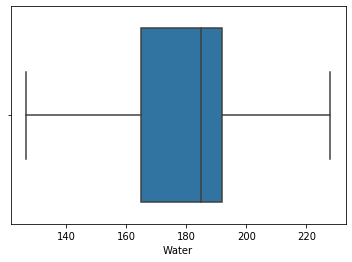

In [37]:
sns.boxplot(data["Water"])

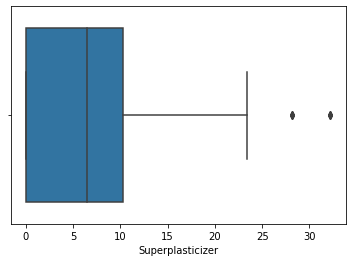

In [38]:
sns.boxplot(data["Superplasticizer"])

In [39]:
q1_sibsp = data["Superplasticizer"].describe()["25%"]
q3_sibsp = data["Superplasticizer"].describe()["75%"]
iqr_sibsp = q3_sibsp - q1_sibsp

In [40]:
l_boundary = q1_sibsp - (1.5 * iqr_sibsp)
u_boundary = q3_sibsp + (1.5 * iqr_sibsp)

In [41]:
data[data["Superplasticizer"] > u_boundary]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
76,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
79,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3
99,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
102,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
122,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
125,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
145,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
148,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
168,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
171,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2


In [42]:
(data[data["Superplasticizer"] > u_boundary].shape[0]/data["Superplasticizer"].shape[0])*10

0.09813542688910698

In [43]:
outlier_index = data[data["Superplasticizer"] > u_boundary].index

In [44]:
outlier_index

Int64Index([76, 79, 99, 102, 122, 125, 145, 148, 168, 171], dtype='int64')

In [45]:
data.drop(outlier_index,inplace = True)

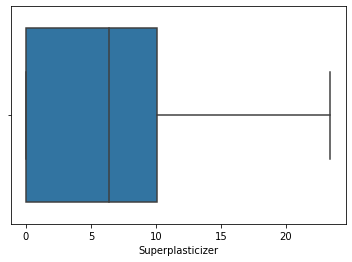

In [46]:
sns.boxplot(data["Superplasticizer"])

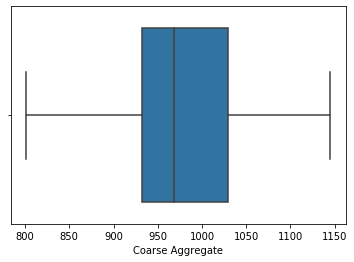

In [47]:
sns.boxplot(data["Coarse Aggregate"])

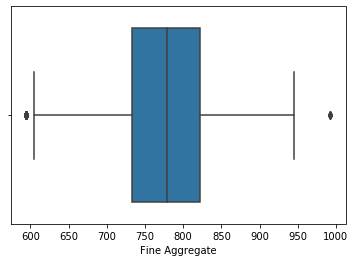

In [48]:
sns.boxplot(data["Fine Aggregate"])

In [49]:
q1_sibsp = data["Fine Aggregate"].describe()["25%"]
q3_sibsp = data["Fine Aggregate"].describe()["75%"]
iqr_sibsp = q3_sibsp - q1_sibsp

In [50]:
l_boundary = q1_sibsp - (1.5 * iqr_sibsp)
u_boundary = q3_sibsp + (1.5 * iqr_sibsp)

In [51]:
data[data["Fine Aggregate"] > u_boundary]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
74,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
97,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
120,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7
143,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
166,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5


In [52]:
(data[data["Fine Aggregate"] > u_boundary].shape[0]/data["Fine Aggregate"].shape[0])*100

0.4955401387512388

In [53]:
outlier_index = data[data["Fine Aggregate"] > u_boundary].index

In [54]:
outlier_index

Int64Index([74, 97, 120, 143, 166], dtype='int64')

In [55]:
data.drop(outlier_index,inplace = True)

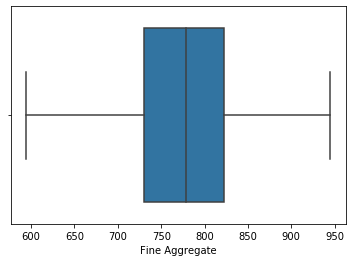

In [56]:
sns.boxplot(data["Fine Aggregate"])

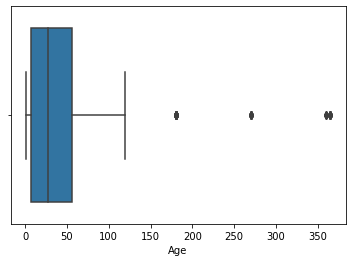

In [57]:
sns.boxplot(data["Age"])

In [58]:
q1_sibsp = data["Age"].describe()["25%"]
q3_sibsp = data["Age"].describe()["75%"]
iqr_sibsp = q3_sibsp - q1_sibsp

In [59]:
l_boundary = q1_sibsp - (1.5 * iqr_sibsp)
u_boundary = q3_sibsp + (1.5 * iqr_sibsp)

In [60]:
data[data["Age"] > u_boundary]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
12,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270,43.01
17,342.0,38.0,0.0,228.0,0.0,932.0,670.0,365,56.14
19,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180,42.62
20,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
23,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,180,44.21
24,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365,52.52


In [61]:
(data[data["Age"] > u_boundary].shape[0]/data["Age"].shape[0])*100

5.876494023904383

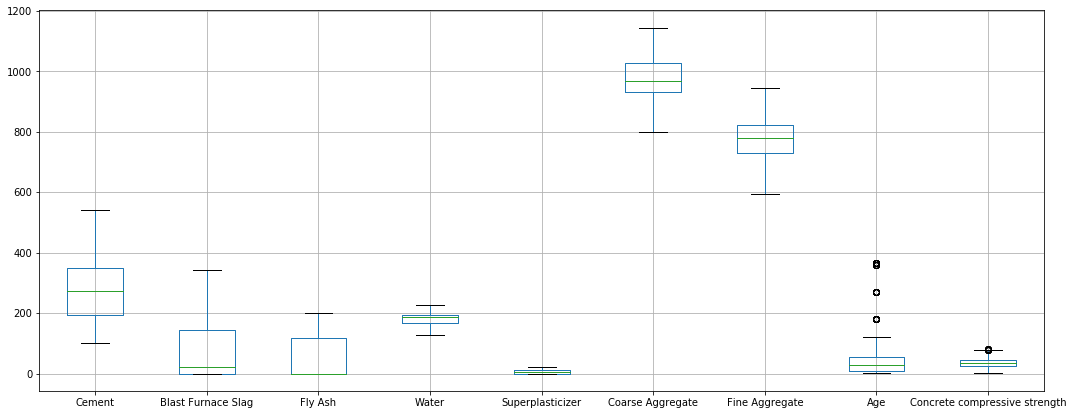

In [62]:
data.boxplot(figsize=(18,7))

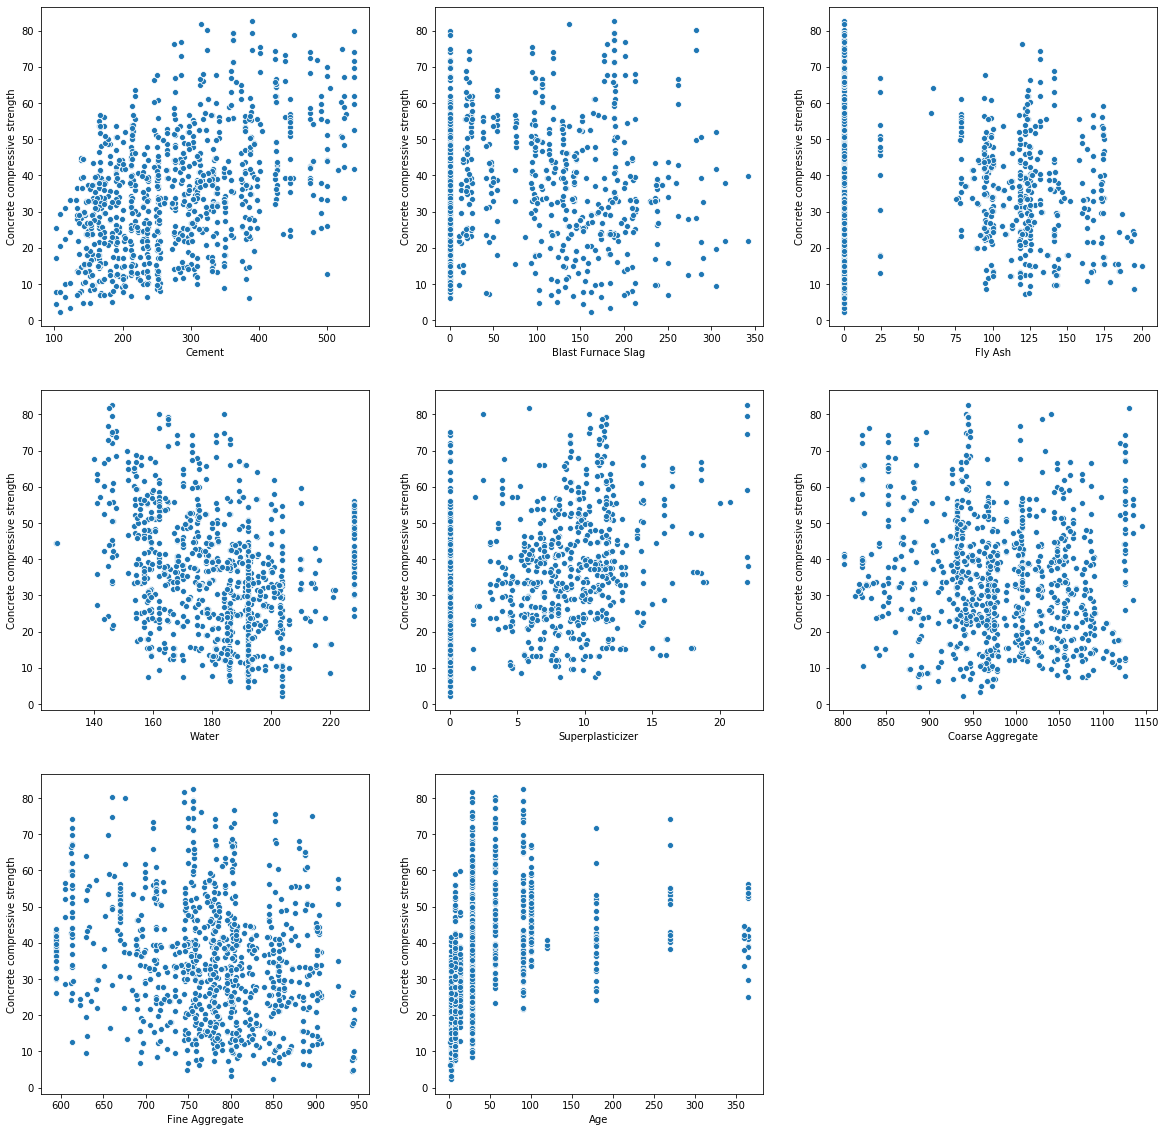

In [63]:
y1=data["Concrete compressive strength"] #target column
plt.figure(figsize=(20,20),facecolor='white') #setting the figure size
plotnumber = 1

for column in data.columns[:8]: #iterating through each columns
    ax = plt.subplot(3,3,plotnumber) #as we have 9 columns that why we are 3X3
    sns.scatterplot(data[column],y1) #plottng scatterplot
    plt.xlabel(column,fontsize=10) #labeling the column name at x-axis
    plotnumber+=1
plt.show()

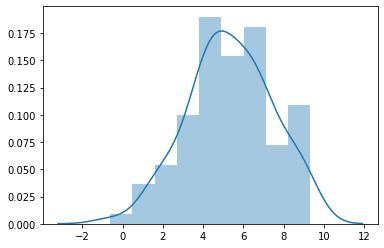

In [64]:
from scipy import stats
c=np.random.normal(loc=5, size=100,scale=2)
sns.distplot(c)

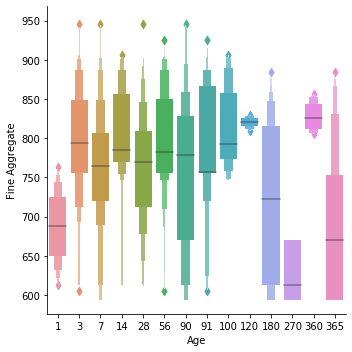

In [65]:
sns.catplot(x="Age", y="Fine Aggregate",kind="boxen", data=data)

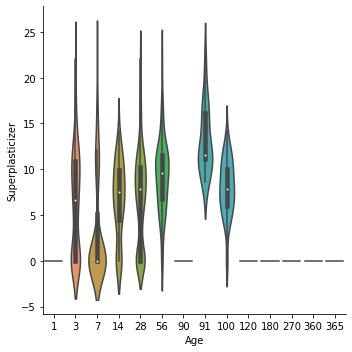

In [66]:
sns.catplot(x="Age", y="Superplasticizer",kind="violin", data=data)

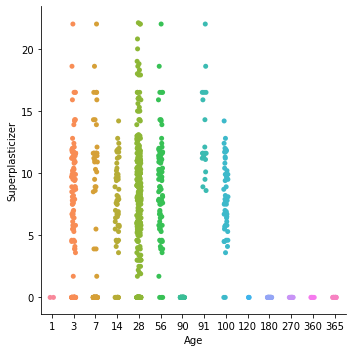

In [67]:
sns.catplot(x="Age",y="Superplasticizer",data=data)

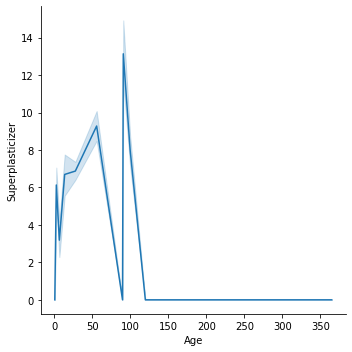

In [68]:
sns.relplot(x="Age",y="Superplasticizer",data=data,kind="line")

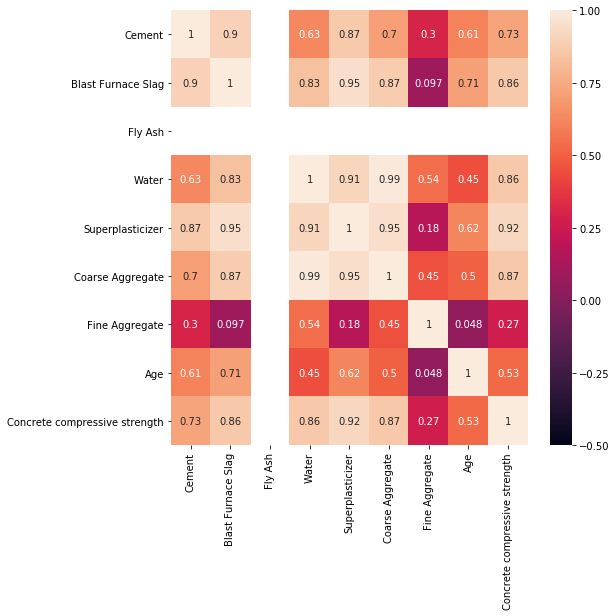

In [69]:
plt.figure(figsize=(8,8)) #figure size of width-8 and height-8
sns.heatmap(data[:8].corr().abs(), vmin = -0.5,vmax = 1,annot=True)#correlation between independent coloumn

In [70]:
x=pd.DataFrame(data,columns=data.columns[:8]) #independet columns
y=pd.DataFrame(data,columns=data.columns[8:]) #dependent column

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(y_train.shape)

(803, 8)
(803, 1)


In [72]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor() #object of GradientBoostingRegressor 
gbr.fit(x_train,y_train) # training our data using fit method 

C:\Users\vimal vp\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [73]:
score=gbr.score(x_test,y_test)

print("Score of Gradient Boosting model:",score)#checking the score with both the model

Score of Gradient Boosting model: 0.8892540051500727


In [74]:
y_pred =gbr.predict(x_test) #predicting the output using predict method(using build model)
print("Prediction made by Gradient Boosting model:",y_pred)

Prediction made by Gradient Boosting model: [39.4420131  14.34542426 31.97793777 49.147979   18.81373479 42.45495198
 16.74739612 36.17175739 51.304997   31.98097116 32.33546732 61.10619326
 17.0496709  42.98173664 33.2335148  67.1495083  47.72022609 42.73905399
 25.14504108 46.19158516 25.08020805 38.07362524 45.45453188 42.46998979
 37.48631245 64.17883576 52.33995001 30.53187785 36.59285178  8.86553321
 22.82731861 31.75833444 13.86799039 31.66050914 39.71521494  7.29647975
 28.06026754 45.14728599  7.7034543  32.11102127 17.66822885 45.1485203
 46.29479479 45.44592899 45.40919422 50.11059028 19.39766841 42.79422768
 23.36803871 42.69365865 48.23830548 48.74644365 41.63631522 39.60152824
 76.53738924 21.6789883  34.61530816 46.19158516 60.50018072 37.02013008
 28.8564226  16.12076076 17.78372294 27.97983331 10.96600952 33.27161092
 34.512447   44.21475993 47.4622268  50.07250814 39.46977942 43.97850452
 43.94792558 12.28095988 37.40300971 50.07250814 26.87305138 14.32117827
 53.6400

In [75]:
from sklearn import metrics #importing the metrics library
print("MEAN ABSOLUTE ERROR (MAE):",metrics.mean_absolute_error(y_test,y_pred)) #Mean Absolute Error
print("MEAN SQUARED ERROR (MSE):",metrics.mean_squared_error(y_test,y_pred)) # Mean Square Error
print("ROOT MEAN SQUARE ERROR (RMSE):",np.sqrt(metrics.mean_squared_error(y_test,y_pred))) # Root Mean Square Error

MEAN ABSOLUTE ERROR (MAE): 3.7272648498115672
MEAN SQUARED ERROR (MSE): 24.535985632037345
ROOT MEAN SQUARE ERROR (RMSE): 4.95338123225311


In [76]:
pickle.dump(gbr, open('prediction_strength.pkl','wb'))  #dumbing the model

In [77]:
data.columns


Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

In [78]:
from sklearn import ensemble
Rand = ensemble.RandomForestRegressor()
Rand.fit(x_train,y_train)
p3 = Rand.predict(x_train)
from sklearn import metrics
print(metrics.r2_score(p3,y_train))

0.9813284399883053


C:\Users\vimal vp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vimal vp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
pickle.dump(Rand, open('prediction_strength1.pkl','wb'))